# **UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE**

## **INSTITUTO METRÓPOLE DIGITAL**

### **CIÊNCIA DE DADOS**

DOCENETE: DANIEL SABINO

DISCENTES: EDUARDA CHIESA E SIDNEY ALVES

## Importação das bibliotecas e carregamento da base de dados

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

### Formatando base de dados

Acessando os arquivos

In [2]:
diretorio = './Base_Dados'
arquivos = os.listdir(diretorio)
arquivos.sort()

print(f'Quantidade de arquivos: {len(arquivos)}')
print('Listagem dos arquivos:')

for arquivo in arquivos:
    print('\t', arquivo)

Quantidade de arquivos: 22
Listagem dos arquivos:
	 investimentos_cnpq_2002.csv
	 investimentos_cnpq_2003.csv
	 investimentos_cnpq_2004.csv
	 investimentos_cnpq_2005.csv
	 investimentos_cnpq_2006.csv
	 investimentos_cnpq_2007.csv
	 investimentos_cnpq_2008.csv
	 investimentos_cnpq_2009.csv
	 investimentos_cnpq_2010.csv
	 investimentos_cnpq_2011.csv
	 investimentos_cnpq_2012.csv
	 investimentos_cnpq_2013.csv
	 investimentos_cnpq_2014.csv
	 investimentos_cnpq_2015.csv
	 investimentos_cnpq_2016.csv
	 investimentos_cnpq_2017.csv
	 investimentos_cnpq_2018.csv
	 investimentos_cnpq_2019.csv
	 investimentos_cnpq_2020.csv
	 investimentos_cnpq_2021.csv
	 investimentos_cnpq_2022.csv
	 investimentos_cnpq_2023.csv


Carregando as bases de dados desde 2002 até 2018, pois ambas possuem o mesmo *encoding = 'latin-1'*

In [3]:
df = []
arquivos_2002_2018 = arquivos[:-5]

for arquivo in arquivos_2002_2018:

    header = None
    df_temp = []
    caminho = os.path.join(diretorio, arquivo)

    with open(caminho, 'r', encoding='latin-1') as f:
        data = csv.reader(f, delimiter=',')
        for i, linha in enumerate(data):
            if i == 0:
                header = linha
            else:
                df_temp.append(linha)
    
    df.append(pd.DataFrame(df_temp, columns=header))

In [4]:
for i, data in enumerate(df):
    print(f'Número de linhas x colunas do df de {2002+i}: {len(data)} x {len(data.columns)}')

Número de linhas x colunas do df de 2002: 21667 x 21
Número de linhas x colunas do df de 2003: 34520 x 21
Número de linhas x colunas do df de 2004: 42225 x 21
Número de linhas x colunas do df de 2005: 44634 x 21
Número de linhas x colunas do df de 2006: 48524 x 21
Número de linhas x colunas do df de 2007: 59214 x 21
Número de linhas x colunas do df de 2008: 94840 x 21
Número de linhas x colunas do df de 2009: 127633 x 21
Número de linhas x colunas do df de 2010: 157780 x 21
Número de linhas x colunas do df de 2011: 169064 x 21
Número de linhas x colunas do df de 2012: 182193 x 21
Número de linhas x colunas do df de 2013: 195332 x 21
Número de linhas x colunas do df de 2014: 207455 x 21
Número de linhas x colunas do df de 2015: 206491 x 21
Número de linhas x colunas do df de 2016: 171675 x 21
Número de linhas x colunas do df de 2017: 153539 x 21
Número de linhas x colunas do df de 2018: 155731 x 21


Carregando e formatando a base referente 2019. Essa base necessita da conversão do atributo *Valor Pago* de `str` para `float`. Para que isso seja possível, foi realizada a remoção do caractere `,` que estava sendo usado como separador das casas decimais; e separador entre centena e milhar.

In [5]:
caminho = os.path.join(diretorio, arquivos[-5])
header = None
arquivo_2019 = []
with open(caminho, 'r', encoding='latin-1') as f:
    data = csv.reader(f)
    for i,linha in enumerate(data):
        if i == 0:
            header = linha
        else:
            if len(linha) == 21:
                linha[-1] = float(linha[-1].replace(',', ''))
                arquivo_2019.append(linha)
            if len(linha) > 21:
                aux = float(linha[-2].replace(',', ''))
                linha[:] = linha[:-2]
                linha.append(aux)
                arquivo_2019.append(linha)

arquivo_2019 = pd.DataFrame(arquivo_2019, columns=header)
df.append(arquivo_2019)
del(arquivo_2019)

Carregando e formatando a base referente 2020. A base vem com uma coluna extra referente aos índices e o *Valor Pago*, como os valores decimais são `,00`, basta somente remover os caracteres usados como separadores entre centena e milhar e realizar a conversão do tipo de dado para `float`.

In [6]:
caminho = os.path.join(diretorio, arquivos[-4])
header = None
arquivo_2020 = []
with open(caminho, 'r', encoding='latin-1') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i == 0:
            header = linha[1:]
        else:
            if len(linha) > 21:
                linha = linha[1:]
                linha[-1] = float(linha[-1].replace(',', ''))
            arquivo_2020.append(linha)

arquivo_2020 = pd.DataFrame(arquivo_2020, columns=header)
df.append(arquivo_2020)
del(arquivo_2020)

Carregando e formatando a base referente 2021. Devemos corrigir a primeira coluna que possui caracteres adicionais, além de remover 10 colunas adicionais que estão vazias.

In [7]:
caminho = os.path.join(diretorio, arquivos[-3])
header = None
arquivo_2021 = []
with open(caminho, 'r', encoding='utf-8') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i == 0:
            linha[0] = 'Ano Referência'
            linha = linha[:-10]
            header = linha
        else:
            linha = linha[:-10]
            linha[-1] = float(linha[-1].replace('.', '').replace(',', '.'))
            arquivo_2021.append(linha)

arquivo_2021 = pd.DataFrame(arquivo_2021, columns=header)
df.append(arquivo_2021)
del(arquivo_2021)    

Carregando e formatando a base referente 2022. Foi necesário realizar split das colunas separando por `,`, remover caracteres adicionais e converter `Valor Pago` para `float`.

In [8]:
caminho = os.path.join(diretorio, arquivos[-2])
header = None
arquivo_2022 = []
with open(caminho, 'r', encoding='latin-1') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i > 4:
            if i == 5:
                linha = linha[0].split(',')
                header = linha
            if i > 5:
                linha = linha[0].replace('"', '')
                linha = linha.split(',')
                linha = linha[:-1]
                linha[-1] = linha[-1][3:]
                if len(linha) < 29:
                    try:
                        linha[-1] = float(linha[-1])
                    except:
                        pass

arquivo_2022 = arquivo_2022[1:]
arquivo_2022 = pd.DataFrame(arquivo_2022, columns=header)
df.append(arquivo_2022)
del(arquivo_2022)

Carregando e formatando a base referente 2023. É feita a remoção de caracteres desnecessários, assim como a remoção de colunas adicionais.

In [9]:
caminho = os.path.join(diretorio, arquivos[-1])
header = None
arquivo_2023 = []
with open(caminho, 'r', encoding='utf-8') as f:
    data = csv.reader(f, delimiter=';')
    for i,linha in enumerate(data):
        if i > 4:
            linha = linha[:27]
            if i == 5:
                header = linha
            if i > 5:
                linha[-1] = linha[-1][3:]
                linha[-1] = linha[-1].replace('.','')
                linha[-1] = float(linha[-1].replace(',', '.'))
                arquivo_2023.append(linha)

arquivo_2023 = pd.DataFrame(arquivo_2023, columns=header)
df.append(arquivo_2023)
del(arquivo_2023)

Criação do dataset como a concatenação das base de dados

In [10]:
dataset = pd.concat(df, axis=0, ignore_index=True)
del(df)

In [11]:
dataset.head()

,Ano Referência,Processo,Beneficiário,Linha de Fomento,Modalidade,Categoria/Nível,Nome Chamada,Programa CNPq,Grande Área,Área,...,Região,Título do Projeto,Palavra Chave,UO,Programa PPA,Ação PPA,Natureza de Despesa,Data Início Processo,Data Término Processo,Região Destino
0,2002,130942/2000-6,Abad Oliveira Souza Júnior,Bolsas de Mestrado,GM - Mestrado,,,Programa Básico de Geociências: Geofísica e Ge...,Ciências Exatas e da Terra,Geociências,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,131008/2001-3,Abel Batista de Oliveira,Bolsas de Mestrado,GM - Mestrado,,,PROGRAMA BASICO DE AGRONOMIA,Ciências Agrárias,Agronomia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,131008/2001-3,Abel Batista de Oliveira,Bolsas de Mestrado,GM - Mestrado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE AGRONOMIA,Ciências Agrárias,Agronomia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,132920/2002-6,Abel Bemvenuti,Bolsas de Mestrado,GM - Mestrado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE BIOFISICA,Ciências Biológicas,Biofísica,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,141578/2002-5,Abel Guilhermino da Silva Filho,Bolsas de Doutorado,GD - Doutorado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE CIENCIA DA COMPUTACAO,Ciências Exatas e da Terra,Ciência da Computação,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Pré processamento dos dados

Verificando os tipos de dados no dataset.

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728150 entries, 0 to 2728149
Data columns (total 31 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Ano Referência             object
 1   Processo                   object
 2   Beneficiário               object
 3   Linha de Fomento           object
 4   Modalidade                 object
 5   Categoria/Nível            object
 6   Nome Chamada               object
 7   Programa CNPq              object
 8   Grande Área                object
 9   Área                       object
 10  Subárea                    object
 11  Instituição Origem         object
 12  Sigla UF Origem            object
 13  País Origem                object
 14  Instituição Destino        object
 15  Sigla Instituição Destino  object
 16  Sigla Instituição Macro    object
 17  Cidade Destino             object
 18  Sigla UF Destino           object
 19  País Destino               object
 20  Valor Pago              

Verificando todas as colunas existentes do dataset

In [13]:
dataset.columns

Index(['Ano Referência', 'Processo', 'Beneficiário', 'Linha de Fomento',
       'Modalidade', 'Categoria/Nível', 'Nome Chamada', 'Programa CNPq',
       'Grande Área', 'Área', 'Subárea', 'Instituição Origem',
       'Sigla UF Origem', 'País Origem', 'Instituição Destino',
       'Sigla Instituição Destino', 'Sigla Instituição Macro',
       'Cidade Destino', 'Sigla UF Destino', 'País Destino', 'Valor Pago',
       'Região', 'Título do Projeto', 'Palavra Chave', 'UO', 'Programa PPA',
       'Ação PPA', 'Natureza de Despesa', 'Data Início Processo',
       'Data Término Processo', 'Região Destino'],
      dtype='object')

Mantendo as colunas em comum entre as base de dados

In [14]:
lista_interesse = ['Ano Referência', 'Processo', 'Beneficiário', 'Linha de Fomento', 'Modalidade', 'Categoria/Nível', 'Nome Chamada', 'Programa CNPq', 'Grande Área', 'Área', 'Subárea', 'Instituição Origem', 'Sigla UF Origem', 'País Origem', 'Instituição Destino', 'Sigla Instituição Destino', 'Sigla Instituição Macro', 'Cidade Destino', 'Sigla UF Destino', 'País Destino', 'Valor Pago']

In [15]:
col_exist = [coluna for coluna in lista_interesse if coluna in dataset.columns]
print(col_exist)

['Ano Referência', 'Processo', 'Beneficiário', 'Linha de Fomento', 'Modalidade', 'Categoria/Nível', 'Nome Chamada', 'Programa CNPq', 'Grande Área', 'Área', 'Subárea', 'Instituição Origem', 'Sigla UF Origem', 'País Origem', 'Instituição Destino', 'Sigla Instituição Destino', 'Sigla Instituição Macro', 'Cidade Destino', 'Sigla UF Destino', 'País Destino', 'Valor Pago']


In [16]:
dataset = dataset[col_exist]
dataset.head()

,Ano Referência,Processo,Beneficiário,Linha de Fomento,Modalidade,Categoria/Nível,Nome Chamada,Programa CNPq,Grande Área,Área,...,Instituição Origem,Sigla UF Origem,País Origem,Instituição Destino,Sigla Instituição Destino,Sigla Instituição Macro,Cidade Destino,Sigla UF Destino,País Destino,Valor Pago
0,2002,130942/2000-6,Abad Oliveira Souza Júnior,Bolsas de Mestrado,GM - Mestrado,,,Programa Básico de Geociências: Geofísica e Ge...,Ciências Exatas e da Terra,Geociências,...,,,-,Universidade de São Paulo,USP,USP,São Paulo,SP,BRA - Brasil,"1449,04"
1,2002,131008/2001-3,Abel Batista de Oliveira,Bolsas de Mestrado,GM - Mestrado,,,PROGRAMA BASICO DE AGRONOMIA,Ciências Agrárias,Agronomia,...,,,-,Universidade Federal Rural de Pernambuco,UFRPE,UFRPE,Recife,PE,BRA - Brasil,"7245,2"
2,2002,131008/2001-3,Abel Batista de Oliveira,Bolsas de Mestrado,GM - Mestrado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE AGRONOMIA,Ciências Agrárias,Agronomia,...,,,-,Universidade Federal Rural de Pernambuco,UFRPE,UFRPE,Recife,PE,BRA - Brasil,"1449,04"
3,2002,132920/2002-6,Abel Bemvenuti,Bolsas de Mestrado,GM - Mestrado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE BIOFISICA,Ciências Biológicas,Biofísica,...,,,-,Universidade Federal do Rio de Janeiro,UFRJ,UFRJ,Rio de Janeiro,RJ,BRA - Brasil,"3622,6"
4,2002,141578/2002-5,Abel Guilhermino da Silva Filho,Bolsas de Doutorado,GD - Doutorado,,Cotas do Programa de Pós-Graduação,PROGRAMA BASICO DE CIENCIA DA COMPUTACAO,Ciências Exatas e da Terra,Ciência da Computação,...,,,-,Universidade Federal de Pernambuco,UFPE,UFPE,Recife,PE,BRA - Brasil,"5364,45"


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728150 entries, 0 to 2728149
Data columns (total 21 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Ano Referência             object
 1   Processo                   object
 2   Beneficiário               object
 3   Linha de Fomento           object
 4   Modalidade                 object
 5   Categoria/Nível            object
 6   Nome Chamada               object
 7   Programa CNPq              object
 8   Grande Área                object
 9   Área                       object
 10  Subárea                    object
 11  Instituição Origem         object
 12  Sigla UF Origem            object
 13  País Origem                object
 14  Instituição Destino        object
 15  Sigla Instituição Destino  object
 16  Sigla Instituição Macro    object
 17  Cidade Destino             object
 18  Sigla UF Destino           object
 19  País Destino               object
 20  Valor Pago              

*Modalidade* e *Categoria/Nível* trazem a mesma informação em relação as bolsa. O interessão é voltado para as instituições que foram beneficiadas (destino) podendo remover informações da *Origem*. Além disso, o interesse são as bolsas ofertadas no **Brasil**.

Referência: [Tabela de Valores de Bolsas no País](https://www.gov.br/cnpq/pt-br/acesso-a-informacao/bolsas-e-auxilios/copy_of_modalidades/tabela-de-valores-no-pais)

In [18]:
dataset['País Destino'].value_counts()

País Destino
BRA - Brasil                 2626881
ING - Inglaterra               16459
 -                             12327
AUS - Austrália                11614
CAN - Canadá                   11013
                              ...   
RCA - Rep.Centro-Africana          1
RS - Sérvia                        1
QUE - Quênia                       1
BOL - Bolívia                      1
MLT - Malta                        1
Name: count, Length: 81, dtype: int64

In [19]:
dataset = dataset[dataset['País Destino'] == 'BRA - Brasil']
dataset = dataset.drop(columns=['Categoria/Nível', 'Instituição Origem', 'Sigla UF Origem', 'País Origem', 'País Destino'])

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2626881 entries, 0 to 2728149
Data columns (total 16 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Ano Referência             object
 1   Processo                   object
 2   Beneficiário               object
 3   Linha de Fomento           object
 4   Modalidade                 object
 5   Nome Chamada               object
 6   Programa CNPq              object
 7   Grande Área                object
 8   Área                       object
 9   Subárea                    object
 10  Instituição Destino        object
 11  Sigla Instituição Destino  object
 12  Sigla Instituição Macro    object
 13  Cidade Destino             object
 14  Sigla UF Destino           object
 15  Valor Pago                 object
dtypes: object(16)
memory usage: 340.7+ MB


Formatando *Ano Referência* e *Valor Pago* para valores numéricos.

In [21]:
dataset['Ano Referência'] = dataset['Ano Referência'].replace('', '0')
dataset = dataset[dataset['Ano Referência'] > '0']
dataset['Ano Referência'] = dataset['Ano Referência'].dropna()
dataset['Ano Referência'] = dataset['Ano Referência'].astype(int)

dataset['Valor Pago'] = dataset['Valor Pago'].str.replace(',', '.', regex=False)
dataset['Valor Pago'] = dataset['Valor Pago'].astype(float)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2626880 entries, 0 to 2728149
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Ano Referência             int64  
 1   Processo                   object 
 2   Beneficiário               object 
 3   Linha de Fomento           object 
 4   Modalidade                 object 
 5   Nome Chamada               object 
 6   Programa CNPq              object 
 7   Grande Área                object 
 8   Área                       object 
 9   Subárea                    object 
 10  Instituição Destino        object 
 11  Sigla Instituição Destino  object 
 12  Sigla Instituição Macro    object 
 13  Cidade Destino             object 
 14  Sigla UF Destino           object 
 15  Valor Pago                 float64
dtypes: float64(1), int64(1), object(14)
memory usage: 340.7+ MB


Para os valores numéricos, iremos observar a sua distribuição.

In [23]:
dataset.describe()

,Ano Referência,Valor Pago
count,2.626880e+06,1.974673e+06
mean,2.014342e+03,9.569219e+03
std,5.133142e+00,3.467966e+04
min,2.060000e+02,-2.415100e+02
25%,2.011000e+03,1.800000e+03
50%,2.014000e+03,2.800000e+03
75%,2.018000e+03,1.217040e+04
max,2.023000e+03,1.296662e+07


Observando o *Ano Referência*.

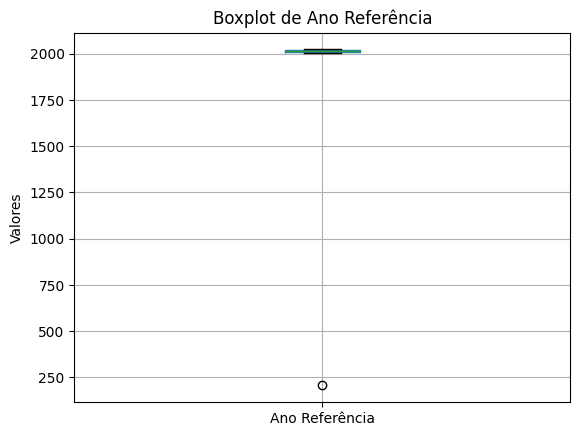

In [24]:
dataset[['Ano Referência']].boxplot()

plt.title('Boxplot de Ano Referência')
plt.ylabel('Valores')
plt.show()

É observado que há outliers em relação ao Ano Referência, é interessante verificar esses dados, 
pois durante a coleta pode ocorrer do preenchimento do ano ter sido com a falta de um caractere.

In [25]:
dataset[dataset['Ano Referência'] < 2002]

,Ano Referência,Processo,Beneficiário,Linha de Fomento,Modalidade,Nome Chamada,Programa CNPq,Grande Área,Área,Subárea,Instituição Destino,Sigla Instituição Destino,Sigla Instituição Macro,Cidade Destino,Sigla UF Destino,Valor Pago
170521,206,470276/2006-1,Lin Chau Ming,Apoio a Projetos de Pesquisas,APQ - Auxílio a Pesquisa,Edital MCT/CNPq 02/2006 - Universal,PROGRAMA BASICO DE BOTANICA,Ciências Biológicas,Botânica,Botânica Aplicada,Departamento de Horticultura,UNESP/BOTUCATU,UNESP,Botucatu,SP,6300.0


Como não sabemos se o valor 206.0 é referente a 2006 ou 2016 e é apenas um único registro, removelo não fará diferença na base de dados.

In [26]:
dataset = dataset.drop(dataset[dataset['Ano Referência'] == 206].index)

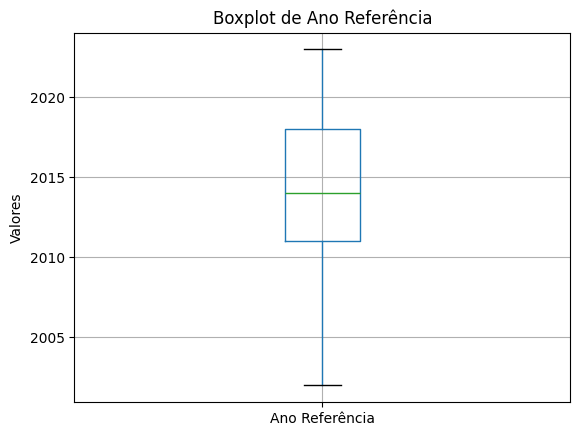

In [27]:
dataset[['Ano Referência']].boxplot()

plt.title('Boxplot de Ano Referência')
plt.ylabel('Valores')
plt.show()

In [28]:
dataset.describe()

,Ano Referência,Valor Pago
count,2.626879e+06,1.974672e+06
mean,2.014343e+03,9.569220e+03
std,5.010418e+00,3.467967e+04
min,2.002000e+03,-2.415100e+02
25%,2.011000e+03,1.800000e+03
50%,2.014000e+03,2.800000e+03
75%,2.018000e+03,1.217040e+04
max,2.023000e+03,1.296662e+07


Observando o *Valor Pago*.

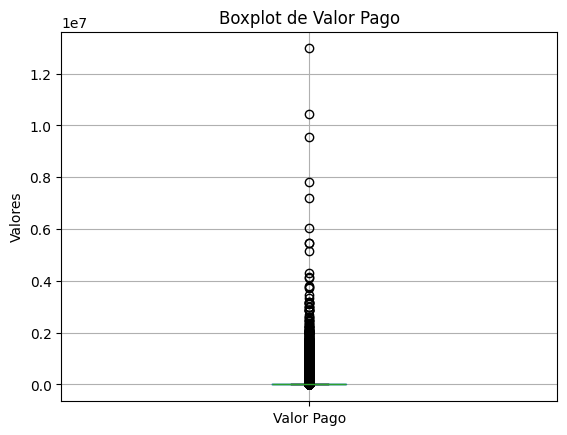

In [29]:
dataset[['Valor Pago']].boxplot()

plt.title('Boxplot de Valor Pago')
plt.ylabel('Valores')
plt.show()

Como visto no site [Tabela de Valores de Bolsas no País](https://www.gov.br/cnpq/pt-br/acesso-a-informacao/bolsas-e-auxilios/copy_of_modalidades/tabela-de-valores-no-pais) o valor máximo para bolsas é de *R$ 14.000,00* e o valor mínimo é de *R$ 300,00*, há variações na base de dados onde há investimentos de bolsas com valores mínimos de *R$ 200,00* e valores que ultrapassam *R$ 50.000,00*.

Há uma bolsa com valor negativo, como se trata de um único registro, o mesmo pode ser removido da base de dados. Além disso há valores registrado com *R$ 0,00*, esses também serão removidos.

In [30]:
dataset[dataset['Valor Pago'] < 200.0].value_counts()

Ano Referência  Processo       Beneficiário                     Linha de Fomento                                  Modalidade                      Nome Chamada                                                                    Programa CNPq                           Grande Área                 Área                 Subárea                                    Instituição Destino                                    Sigla Instituição Destino  Sigla Instituição Macro  Cidade Destino  Sigla UF Destino  Valor Pago
2018            433882/2018-2  Éder Henriqson                   Apoio a Projetos de Pesquisas                     APQ - Auxílio a Pesquisa        Chamada MCTIC/CNPq Nº 28/2018 - Universal/Faixa C - De R$ 0,00 a R$ 120.000,00  PROGRAMA BASICO DE ADMINISTRACAO        Ciências Sociais Aplicadas  Administração        Administração de Setores Específicos       Pontifícia Universidade Católica do Rio Grande do Sul  PUCRS                      PUCRS                    Porto Alegre    RS       

In [31]:
dataset = dataset.drop(dataset[dataset['Valor Pago'] < 200.0].index)

In [32]:
# dataset = dataset[dataset['Valor Pago'] <= 14000.0]

# dataset[['Valor Pago']].boxplot()

# plt.title('Boxplot de Valor Pago')
# plt.ylabel('Valores')
# plt.show()

In [33]:
dataset.describe()

,Ano Referência,Valor Pago
count,2.606219e+06,1.954012e+06
mean,2.014354e+03,9.669379e+03
std,5.024685e+00,3.484877e+04
min,2.002000e+03,2.000000e+02
25%,2.011000e+03,1.800000e+03
50%,2.014000e+03,2.800000e+03
75%,2.019000e+03,1.255068e+04
max,2.023000e+03,1.296662e+07


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2606219 entries, 0 to 2728149
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Ano Referência             int64  
 1   Processo                   object 
 2   Beneficiário               object 
 3   Linha de Fomento           object 
 4   Modalidade                 object 
 5   Nome Chamada               object 
 6   Programa CNPq              object 
 7   Grande Área                object 
 8   Área                       object 
 9   Subárea                    object 
 10  Instituição Destino        object 
 11  Sigla Instituição Destino  object 
 12  Sigla Instituição Macro    object 
 13  Cidade Destino             object 
 14  Sigla UF Destino           object 
 15  Valor Pago                 float64
dtypes: float64(1), int64(1), object(14)
memory usage: 338.0+ MB


## “Ao longo dos anos, como evoluiu a distribuição das bolsas por UF de destino?”

In [35]:
analise_1 = dataset.copy()
analise_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2606219 entries, 0 to 2728149
Data columns (total 16 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Ano Referência             int64  
 1   Processo                   object 
 2   Beneficiário               object 
 3   Linha de Fomento           object 
 4   Modalidade                 object 
 5   Nome Chamada               object 
 6   Programa CNPq              object 
 7   Grande Área                object 
 8   Área                       object 
 9   Subárea                    object 
 10  Instituição Destino        object 
 11  Sigla Instituição Destino  object 
 12  Sigla Instituição Macro    object 
 13  Cidade Destino             object 
 14  Sigla UF Destino           object 
 15  Valor Pago                 float64
dtypes: float64(1), int64(1), object(14)
memory usage: 338.0+ MB


In [40]:
for ano in dataset['Ano Referência'].unique():
    print(f'Possui registros de {ano}')

Possui registros de 2002
Possui registros de 2003
Possui registros de 2004
Possui registros de 2005
Possui registros de 2006
Possui registros de 2007
Possui registros de 2008
Possui registros de 2009
Possui registros de 2010
Possui registros de 2011
Possui registros de 2012
Possui registros de 2013
Possui registros de 2014
Possui registros de 2015
Possui registros de 2016
Possui registros de 2017
Possui registros de 2018
Possui registros de 2019
Possui registros de 2020
Possui registros de 2021
Possui registros de 2023


Removendo linhas que não foram preenchidas com informações.

In [37]:
analise_1 = analise_1.drop(analise_1[analise_1['Sigla UF Destino'] == ''].index)

Número de bolsas por UF

É realizado o agrupamento do *Ano Referência* e da *Sigla UF Destino* para realizar a contagem de ocorrências das linahs por grupo usando `.size()` e após isso é criada uma tabela. Com o uso do `.unstack(fill_value=0)`, *Sigla UF Destino* é transformada em coluna, enquanto *Ano Referência* permanece como linha e a relação entre ambos é a contagem de bolsas.

In [38]:
analise_1 = analise_1.groupby(['Ano Referência', 'Sigla UF Destino']).size()
analise_1 = analise_1.unstack(fill_value=0)
analise_1

Sigla UF Destino,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
Ano Referência,,,,,,,,,,,,,,,,,,,,,
2002,0,46,149,0,306,412,736,83,82,16,...,650,4171,175,7,0,2246,875,6,7642,0
2003,5,92,260,5,570,703,1195,157,202,61,...,1078,6176,345,10,11,3387,1307,45,10916,2
2004,13,127,330,5,796,899,1437,223,294,76,...,1376,7363,507,20,15,4035,1537,75,13160,6
2005,23,168,362,4,972,1082,1707,258,345,94,...,1527,7359,632,27,14,4240,1723,110,13701,17
2006,18,211,486,12,1072,1319,1936,238,468,93,...,1820,7856,688,44,15,4508,1934,139,14834,24
2007,42,194,673,27,1354,1644,2540,286,579,166,...,2271,9503,816,63,18,5828,2407,171,17717,64
2008,167,573,1346,90,2626,2878,4352,544,1156,484,...,4257,14265,1618,171,85,9345,3567,396,24990,249
2009,259,1035,1897,137,3753,4124,6057,818,1785,716,...,6124,18745,2458,281,129,12311,4692,723,31580,397
2010,305,1303,2192,139,5162,5052,7002,1087,2319,913,...,7651,26373,3403,393,183,14975,5704,1174,36263,549


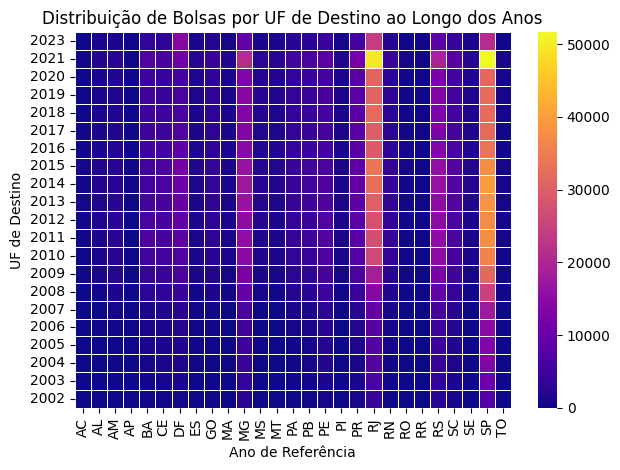

In [39]:
sns.heatmap(analise_1, cmap='plasma', linewidths=0.5)

plt.title('Distribuição de Bolsas por UF de Destino ao Longo dos Anos', fontsize=12)
plt.xlabel('Ano de Referência')
plt.ylabel('UF de Destino')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()